# 📊 Prodigy InfoTech Data Science Internship

### 📝 Task-04: X (Prev. Twitter) Sentiment Patterns Analysis

**Intern:** Hashir Muhammed  
**Track:** Data Science  
**Task Code:** PRODIGY_DS_03  

---

## 🎯 Task Objective:
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

**Dataset Source:** X (Previously Twitter) Sentiment Analysis Dataset

---

### 🛠️ Tools Used:
- Python  
- Pandas  
- NumPy  
- Matplotlib  

---



## 📥 Step 1: Import Required Libraries

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt


## 📑 Step 2: Load the Datasets

In [3]:
# Load training and validation datasets
twitts_train = pd.read_csv("twitter_training.csv")
twitts_valid = pd.read_csv("twitter_validation.csv")

In [4]:
# Define column names
column_name = ['TweetID', 'Entity', 'Sentiment', 'Tweet_Content']

In [5]:
# Apply column names to both datasets
twitts_train.columns = column_name
twitts_valid.columns = column_name

In [6]:
# Combine both datasets into a single DataFrame
twitts = pd.concat([twitts_train, twitts_valid], ignore_index=False)

In [7]:
# Display first 5 records
twitts.head()

,TweetID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


## 📝 Step 3: Explore Dataset Structure and Info

In [8]:
# Check column names
twitts.columns.tolist()

['TweetID', 'Entity', 'Sentiment', 'Tweet_Content']

In [9]:

# Dataset structure and info
twitts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        75680 non-null  int64 
 1   Entity         75680 non-null  object
 2   Sentiment      75680 non-null  object
 3   Tweet_Content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [10]:
# Check for missing values
twitts.isnull().sum()

TweetID            0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64

In [11]:
# Check for duplicate rows
twitts.duplicated().sum()

3216

## 🧹 Step 4: Data Cleaning

In [12]:
# Remove null values
twitts.dropna(inplace=True)

In [13]:
# Remove duplicate rows
twitts.drop_duplicates(inplace=True)

In [14]:
# Confirm no missing values and duplicates remain
print(twitts.isnull().sum())
print("Duplicate Values:", twitts.duplicated().sum())

TweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64
Duplicate Values: 0


## 📌 Step 5: Data Preparation

In [15]:
# Drop irrelevant columns
twitts.drop(columns=['TweetID', 'Tweet_Content'], inplace=True)

In [16]:
# Check final DataFrame structure
twitts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72138 entries, 0 to 995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     72138 non-null  object
 1   Sentiment  72138 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [17]:
# Display first 5 records after cleaning
twitts.head()

,Entity,Sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


# 📊 Step 6: Data Visualization


## 📈 Pie Chart — Distribution of Entities

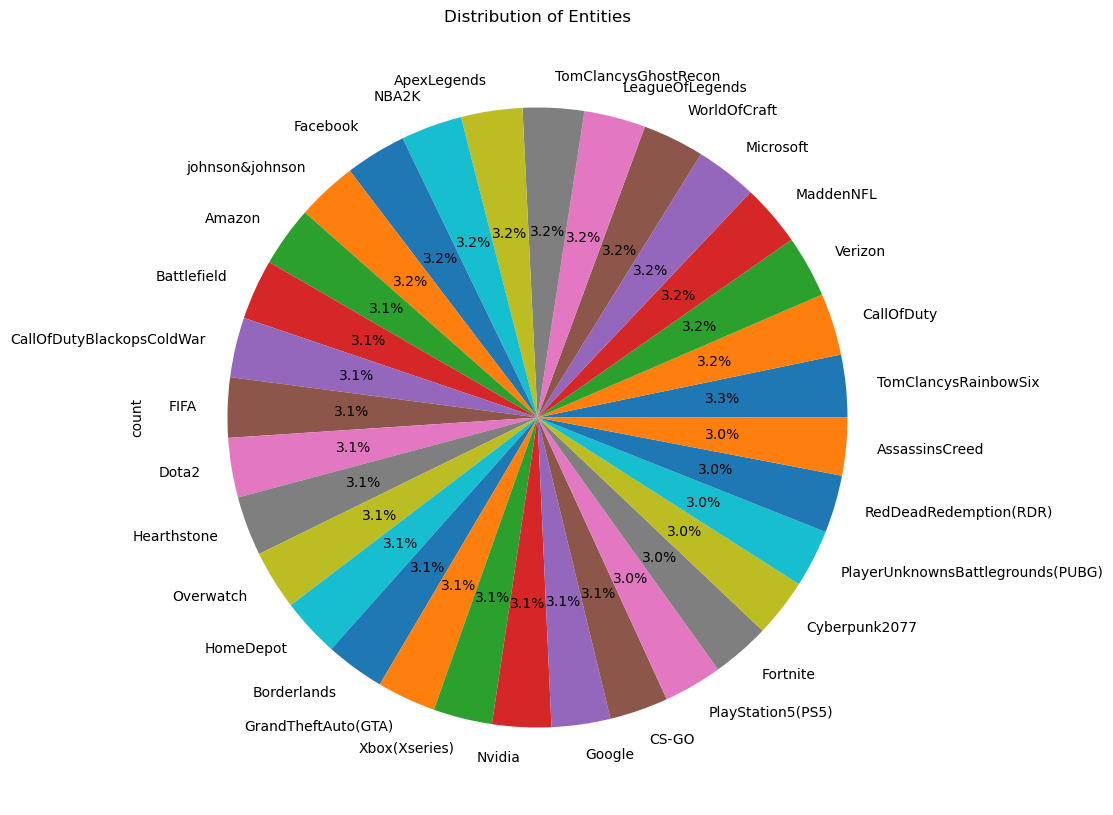

In [18]:
# Entity distribution
entity_content = twitts['Entity'].value_counts()

# Pie chart visualization
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of Entities')
plt.show()


## 📊 Bar Chart — Distribution of Sentiments

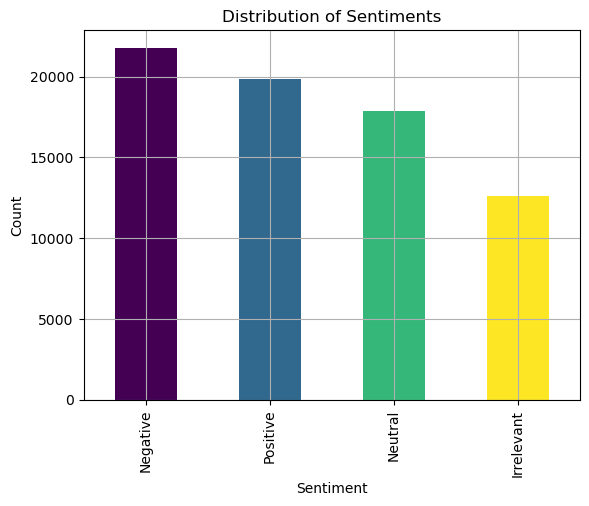

In [19]:
# Sentiment distribution
sentiment_content = twitts['Sentiment'].value_counts()

# Set color scheme
color = plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]

# Bar plot visualization
sentiment_content.plot(kind='bar', color=colors, grid=True)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



## 📊 Bar Chart — Entity-wise Sentiment Reaction


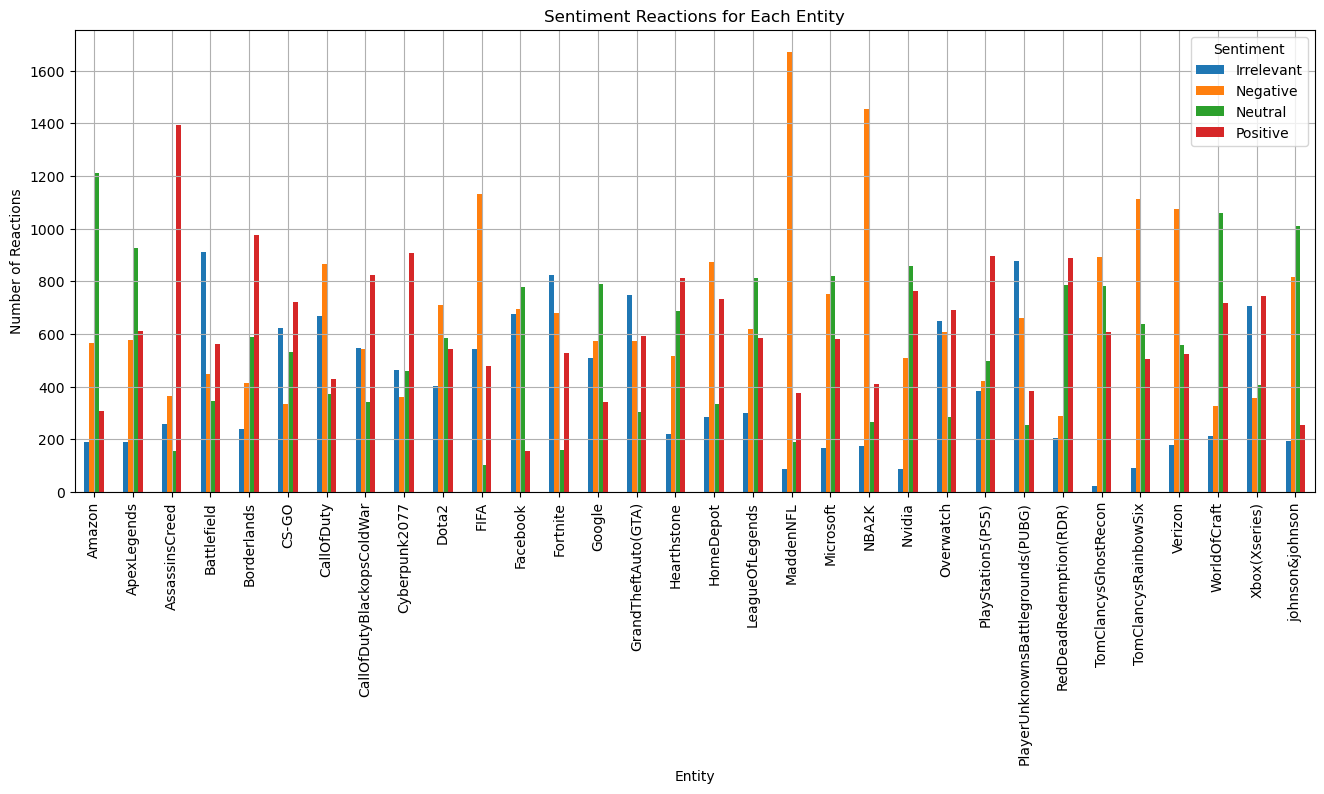

In [20]:
# Crosstab of Entity and Sentiment
reactions_entities = pd.crosstab(twitts['Entity'], twitts['Sentiment'])

# Bar plot for sentiment reactions by entity
reactions_entities.plot(kind='bar', figsize=(16, 6), grid=True)
plt.title('Sentiment Reactions for Each Entity')
plt.xlabel('Entity')
plt.ylabel('Number of Reactions')
plt.show()


# 📌 **Overall Conclusion**

Performed comprehensive sentiment pattern analysis on the X (Prev. Twitter) Sentiment Dataset by cleaning, preparing, and visualizing the data.

**Key insights from the analysis:**

- **MaddenNFL** had the highest number of negative reactions.
- **Battlefield** received the most irrelevant feedback.
- **Amazon** showed the largest share of neutral responses.
- **AssassinsCreed** gathered the most positive reactions from users.

The visualizations provided valuable understanding of how public sentiments vary across different brands and topics on X.

These insights can help organizations monitor brand perception and address audience feedback effectively.

# 📊 Additional Data Visualizations

## 📊 Horizontal Bar Chart — Top 10 Most Mentioned Entities

Shows which brands are most discussed on Twitter.

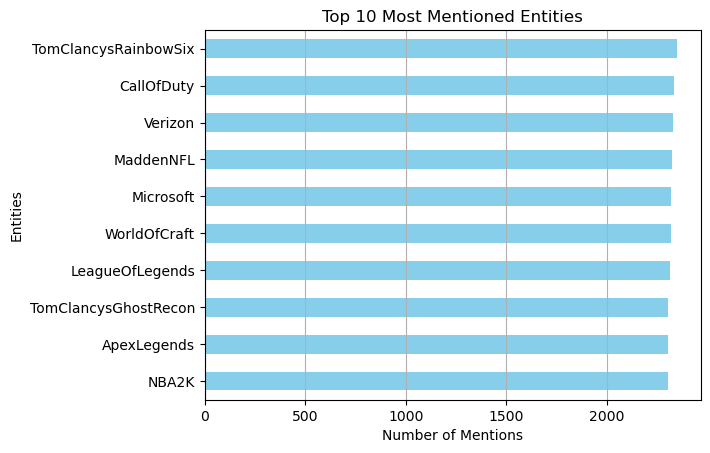

In [23]:
# Top 10 most mentioned entities
top_entities = twitts['Entity'].value_counts().head(10)

# Plot horizontal bar chart
top_entities.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Mentioned Entities')
plt.xlabel('Number of Mentions')
plt.ylabel('Entities')
plt.gca().invert_yaxis()  # To display highest at the top
plt.grid(axis='x')
plt.show()


## 📊 Stacked Bar Chart — Sentiment Composition for Top Entities

Shows how positive, negative, neutral sentiments are distributed for each top entity.

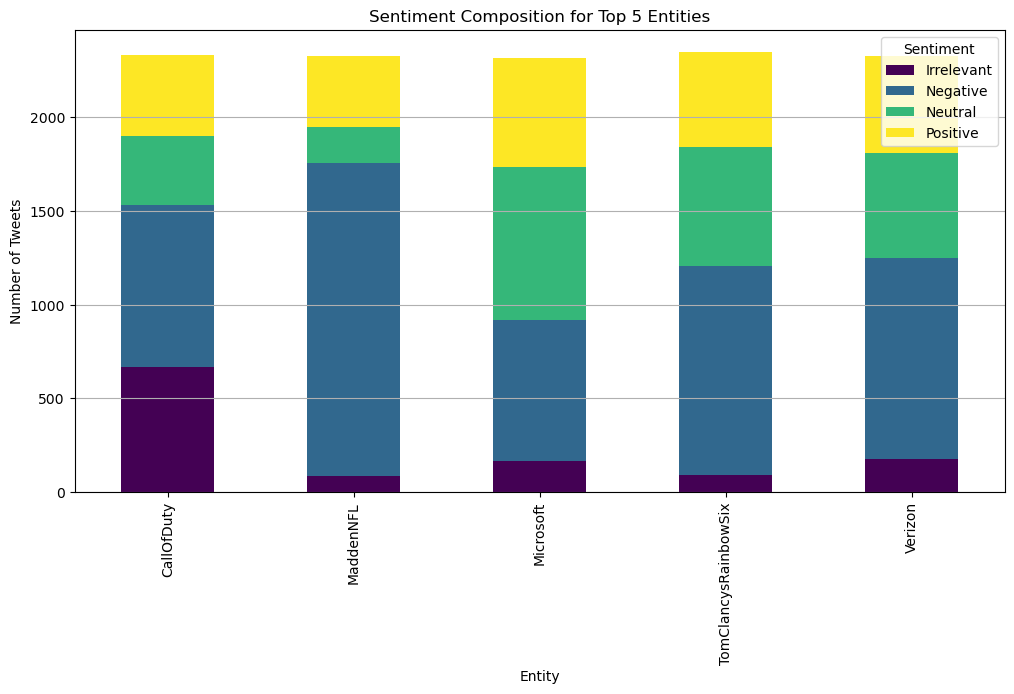

In [25]:
# Sentiment composition for top 5 entities
top_5_entities = twitts['Entity'].value_counts().head(5).index
filtered_twitts = twitts[twitts['Entity'].isin(top_5_entities)]

# Create crosstab with aligned indices
composition = pd.crosstab(filtered_twitts['Entity'], filtered_twitts['Sentiment'])

# Stacked bar plot
composition.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Sentiment Composition for Top 5 Entities')
plt.xlabel('Entity')
plt.ylabel('Number of Tweets')
plt.grid(axis='y')
plt.show()


## 📈 Sentiment Trend Line (if you had timestamp info, but can simulate frequency)
If we had date/time info, you could visualize sentiment trends over time.

As an alternative, you can visualize the cumulative sentiment count progression.

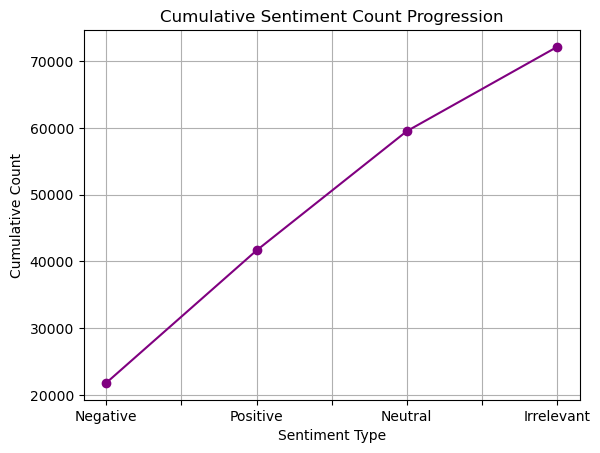

In [26]:
# Cumulative sentiment counts (as a running total)
sentiment_cumsum = twitts['Sentiment'].value_counts().cumsum()

# Line plot
sentiment_cumsum.plot(marker='o', linestyle='-', color='purple')
plt.title('Cumulative Sentiment Count Progression')
plt.xlabel('Sentiment Type')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()


## 📊 Donut Chart — Sentiment Distribution (Prettier Pie Chart)
A cleaner alternative to the simple pie chart, showing sentiment proportions.

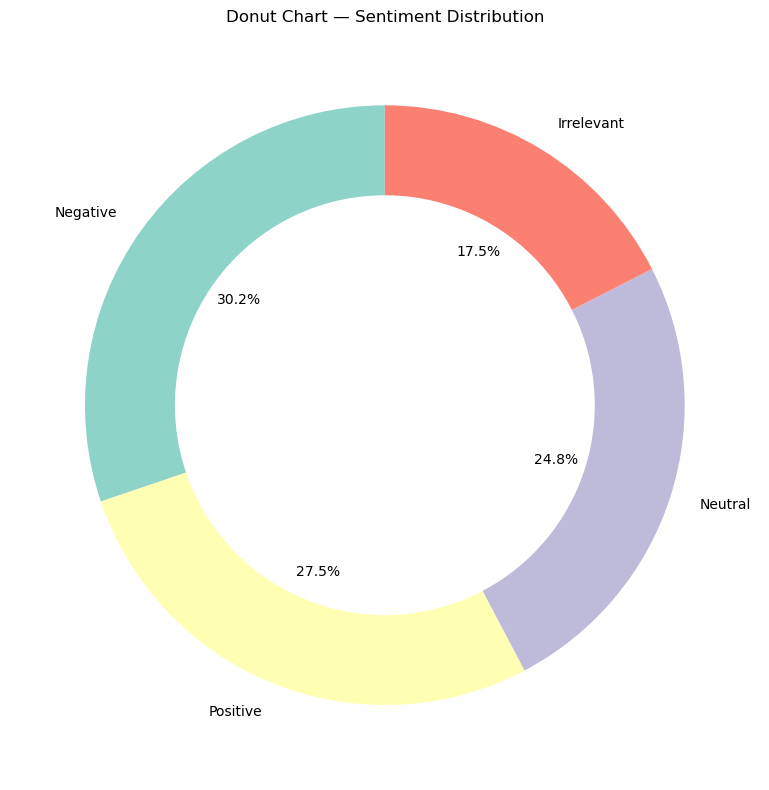

In [27]:
# Sentiment distribution
sentiment_counts = twitts['Sentiment'].value_counts()

# Donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sentiment_counts, labels=sentiment_counts.index, 
                                  autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)

# Draw circle for donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Donut Chart — Sentiment Distribution')
plt.tight_layout()
plt.show()


## 📊 Heatmap — Entity vs. Sentiment Frequency
A heatmap gives a visual sense of concentration and activity for each sentiment type per entity.

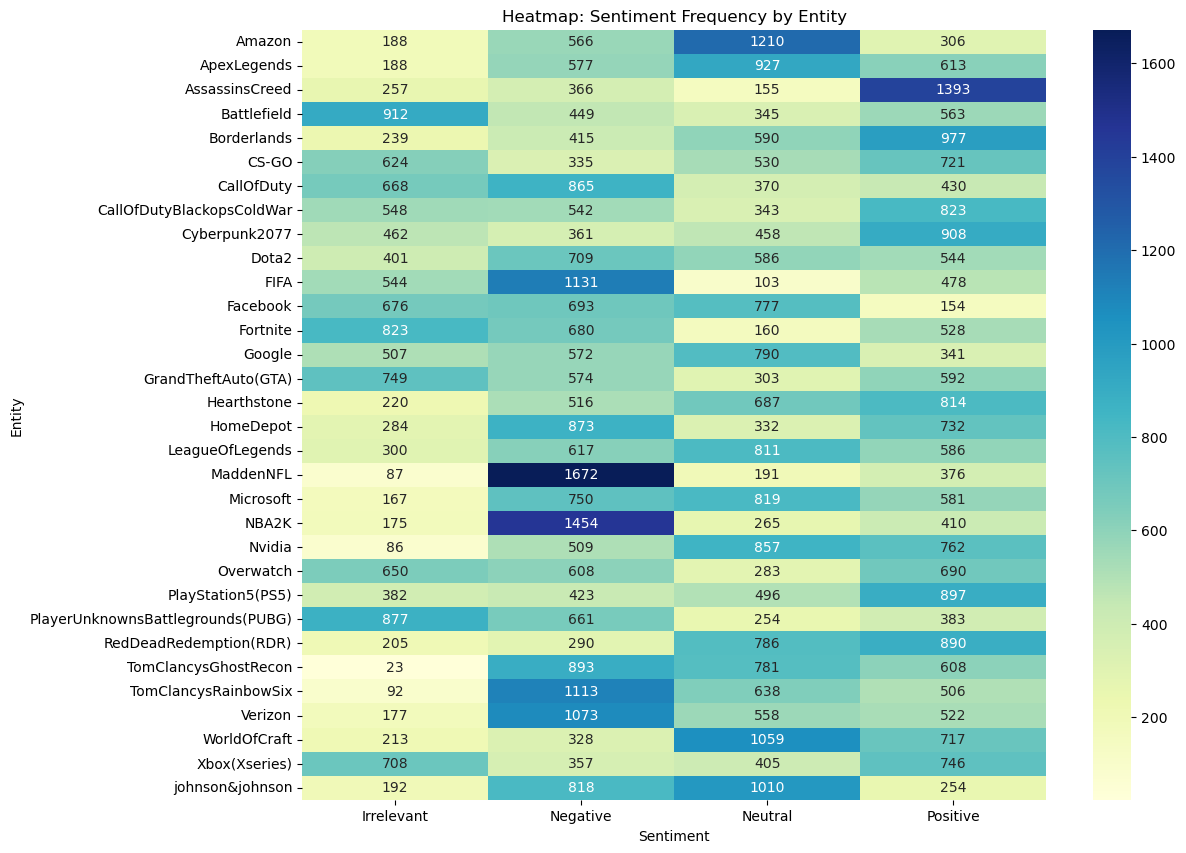

In [28]:
import seaborn as sns

# Create crosstab
heatmap_data = pd.crosstab(twitts['Entity'], twitts['Sentiment'])

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Sentiment Frequency by Entity')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()
